In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
import joblib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.sample(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
262,4,95,70,32,0,32.1,0.612,24,0
643,4,90,0,0,0,28.0,0.610,31,0
480,3,158,70,30,328,35.5,0.344,35,1
677,0,93,60,0,0,35.3,0.263,25,0
491,2,89,90,30,0,33.5,0.292,42,0
671,1,99,58,10,0,25.4,0.551,21,0
432,1,80,74,11,60,30.0,0.527,22,0
347,3,116,0,0,0,23.5,0.187,23,0
752,3,108,62,24,0,26.0,0.223,25,0
672,10,68,106,23,49,35.5,0.285,47,0


In [4]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [5]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [8]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
features = df.columns

In [10]:
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
class_names = ["Outcome"]

In [12]:
tree = model.estimators_[0]
tree

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,422675859
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
model.estimators_[0]

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,422675859
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [15]:
print(len(model.estimators_))

100


IndexError: list index out of range

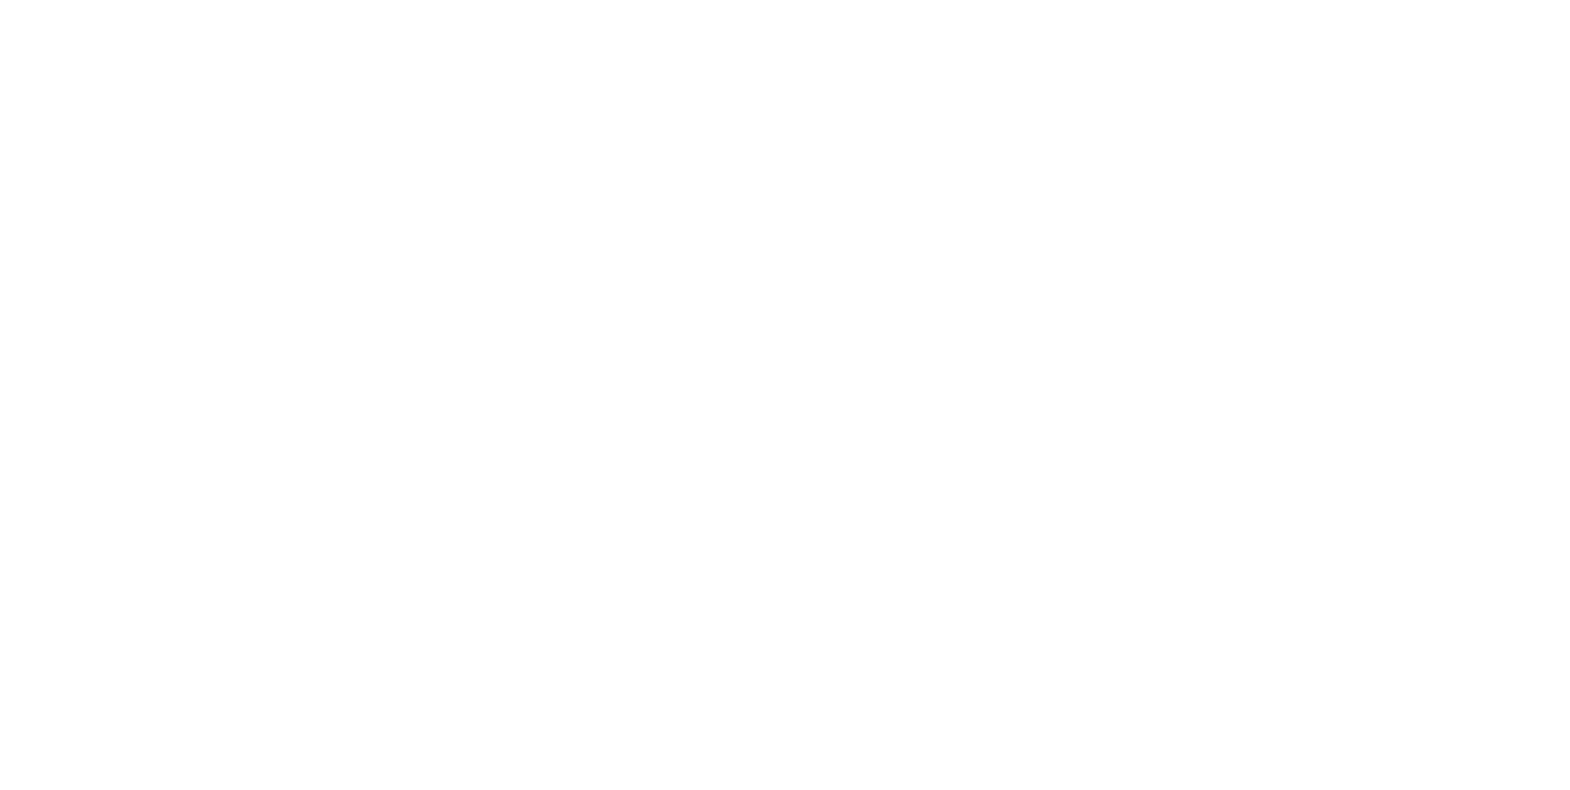

In [14]:
# Extraire un arbre du Random Forest
tree = model.estimators_[0]

# Visualiser l’arbre
plt.figure(figsize=(20, 10))
plot_tree(tree, 
          feature_names=features,    # noms des variables
          class_names=class_names,   # noms des classes
          filled=True, 
          rounded=True)
plt.title("Decision Tree from the Random Forest")
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

In [ ]:
joblib.dump(model, "model.joblib")